## Data processing

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import cv2
import os 
import scipy
from scipy import ndimage

In [2]:
sys.path.append('../initialize_parameters/')
from initialize_parameters import initialize_parameters
sys.path.append('../forward_propagation/')
from forward_propagation import linear_activation_forward
sys.path.append('../compute_cost/')
from compute_cost import compute_cost
sys.path.append('../backward_propagation/')
from back_propagation import linear_activation_backward
sys.path.append('../update_parameters/')
from update_parameters import update_parameters
sys.path.append('../metrics/')
from predict import predict
sys.path.append('../random_mini_batches/')
from random_mini_batches import random_mini_batches

In [3]:
os.chdir('C:\\Users\\Achleshwar Luthra\\Desktop\\Data-Science\\Day-Night Classifier\\create_dataset')

In [4]:
pickle_x = open("Day_X.pickle", "rb")
pickle_y = open("Day_y.pickle", "rb")
X0 = pickle.load(pickle_x)
y0 = pickle.load(pickle_y)
print("Shape of Day_images array: ", X0.shape)
print("No. of Day_images: " , len(y0))

Shape of Day_images array:  (500, 64, 64, 3)
No. of Day_images:  500


y = 0


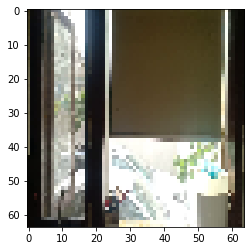

In [5]:
index = 1
plt.imshow(X0[index])
print ("y = " + str(np.squeeze(y0[index])))
plt.show()

In [6]:
pickle_x = open("Night_X.pickle", "rb")
pickle_y = open("Night_y.pickle", "rb")
X1 = pickle.load(pickle_x)
y1 = pickle.load(pickle_y)
print("Shape of Night_images array: ", X1.shape)
print("No. of Night_images: " , len(y1))

Shape of Night_images array:  (500, 64, 64, 3)
No. of Night_images:  500


y = 1


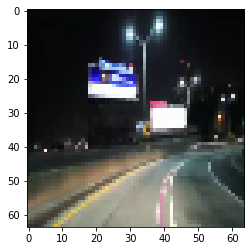

In [7]:
index = 1
plt.imshow(X1[index])
print ("y = " + str(np.squeeze(y1[index])))
plt.show()

In [8]:
X0_train = X0[:400]
y0_train = y0[:400]
X1_train = X1[:400]
y1_train = y1[:400]
X0_test = X0[400:]
y0_test = y0[400:]
X1_test = X1[400:]
y1_test = y1[400:]

X_train = np.concatenate([X0_train, X1_train], axis = 0)
y_train = np.concatenate([y0_train,y1_train])
X_test = np.concatenate([X0_test, X1_test], axis = 0)
y_test = np.concatenate([y0_test,y1_test])
print(X_train.shape)
print(y_train.shape)

(800, 64, 64, 3)
(800,)


In [9]:
# Flatten the training and test images
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
y_train = y_train.reshape(800,1).T
y_test = y_test.reshape(200,1).T

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 800
number of test examples = 200
X_train shape: (12288, 800)
Y_train shape: (1, 800)
X_test shape: (12288, 200)
Y_test shape: (1, 200)


## Model Building

In [10]:
os.chdir('C:\\Users\\Achleshwar Luthra\\Desktop\\Data-Science\\Day-Night Classifier\\final_model')

In [11]:
def model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 3000, print_cost = True):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X --- X_train -- input data, of shape (n_x, number of examples)
    Y --- y_train -- true "label" vector (containing 1 if night, 0 if day), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    n_x, n_h, n_y = layers_dims
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    #initialize parameters
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID.
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. 
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 2.0187338321903816
Cost after iteration 100: 0.6092415481040949
Cost after iteration 200: 0.6048749883113511
Cost after iteration 300: 0.6006067256865347
Cost after iteration 400: 0.5964314520769706
Cost after iteration 500: 0.592383328255246
Cost after iteration 600: 0.5885239190730973
Cost after iteration 700: 0.5849307456237801
Cost after iteration 800: 0.5816127964842384
Cost after iteration 900: 0.5784566817416943
Cost after iteration 1000: 0.5753622095846607
Cost after iteration 1100: 0.5723031975409422
Cost after iteration 1200: 0.5692768552609698
Cost after iteration 1300: 0.5662826000980087
Cost after iteration 1400: 0.5633199294172734
Cost after iteration 1500: 0.5603883474007793
Cost after iteration 1600: 0.5574873640510567
Cost after iteration 1700: 0.5546164951392067
Cost after iteration 1800: 0.5517752621589559
Cost after iteration 1900: 0.5489631922818292
Cost after iteration 2000: 0.5461798183133386
Cost after iteration 2100: 0.5434246786500931
C

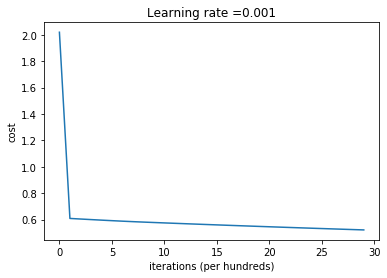

In [17]:
parameters = model(X_train, y_train, (12288, 25, 1))

In [18]:
pred_train = predict(X_train, y_train, parameters)

Accuracy: 0.6937499999999999


In [19]:
pred_test = predict(X_test, y_test, parameters)

Accuracy: 0.715


## Test images

Accuracy: 1.0
Your model returned '0' which implies 'Day'


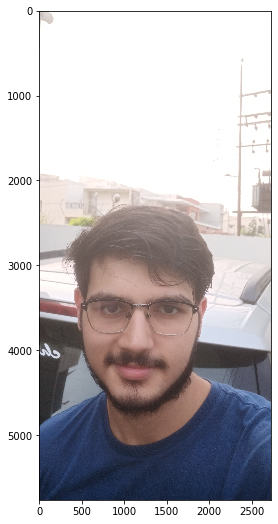

In [20]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "me2.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

Accuracy: 1.0
Your model returned '0' which implies 'Day'


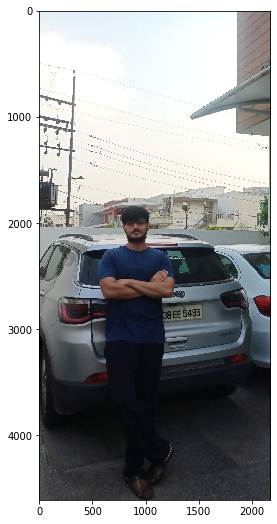

In [58]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "me1.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

Accuracy: 0.0
Your model returned '1' which implies 'Night'


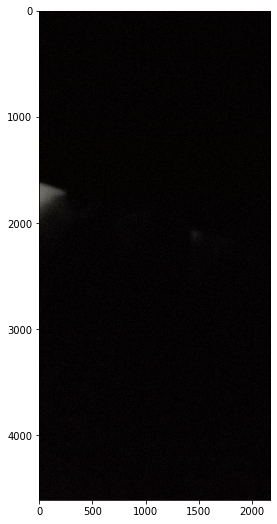

In [60]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "night4.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

In [ ]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "night4.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

## Model with Mini-Batch Gradient Descent

In [16]:
def model_mini_batch(X, y, layers_dims, learning_rate = 0.001, mini_batch_size = 100, num_epochs = 1000, print_cost = True):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X --- X_train -- input data, of shape (n_x, number of examples)
    y --- y_train -- true "label" vector (containing 1 if night, 0 if day), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    learning_rate -- learning rate of the gradient descent update rule
    mini_batch_size -- the size of a mini batch
    num_epochs -- number of epochs
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    n_x, n_h, n_y = layers_dims
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    seed = 1
    #initialize parameters
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for e in range(num_epochs):
        seed = seed + 1
        mini_batches = random_mini_batches(X, y, mini_batch_size, seed)
        tot_cost = 0
        for mini_batch in mini_batches:
            
            (mini_batch_X, mini_batch_y) = mini_batch

            # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID.
            A1, cache1 = linear_activation_forward(mini_batch_X, W1, b1, 'relu')
            A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

            # Compute cost
            total_cost = compute_cost(A2, mini_batch_y)

            # Initializing backward propagation
            dA2 = - (np.divide(mini_batch_y, A2) - np.divide(1 - mini_batch_y, 1 - A2))

            # Backward propagation. 
            dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
            dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')

            # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
            grads['dW1'] = dW1
            grads['db1'] = db1
            grads['dW2'] = dW2
            grads['db2'] = db2

            # Update parameters
            parameters = update_parameters(parameters, grads, learning_rate)

            # Retrieve W1, b1, W2, b2 from parameters
            W1 = parameters["W1"]
            b1 = parameters["b1"]
            W2 = parameters["W2"]
            b2 = parameters["b2"]
        avg_cost = tot_cost/m

        # Print the cost every 100 training example
        if print_cost and e % 100 == 0:
            print("Cost after iteration {}: {}".format(e, np.squeeze(avg_cost)))
        if print_cost and e % 100 == 0:
            costs.append(avg_cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.0
Cost after iteration 100: 0.0
Cost after iteration 200: 0.0
Cost after iteration 300: 0.0
Cost after iteration 400: 0.0
Cost after iteration 500: 0.0
Cost after iteration 600: 0.0
Cost after iteration 700: 0.0
Cost after iteration 800: 0.0
Cost after iteration 900: 0.0


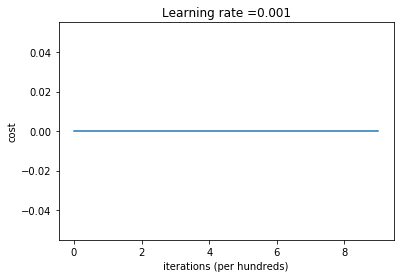

In [17]:
parameters = model_mini_batch(X_train, y_train, (12288, 25, 1))

In [18]:
pred_train = predict(X_train, y_train, parameters)

Accuracy: 0.9524999999999998


In [19]:
pred_test = predict(X_test, y_test, parameters)

Accuracy: 0.9799999999999998


## Test images

Accuracy: 1.0
Your model returned '0' which implies 'Day'


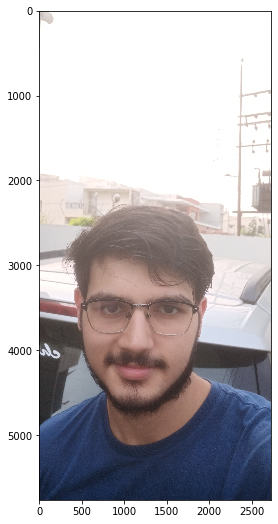

In [21]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "me2.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

Accuracy: 1.0
Your model returned '0' which implies 'Day'


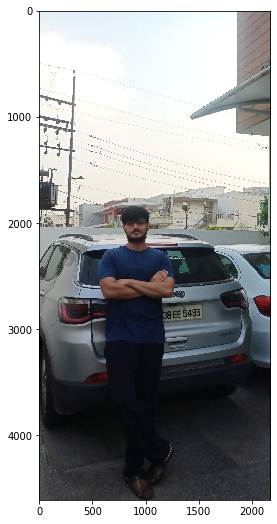

In [22]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "me1.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

Accuracy: 0.0
Your model returned '1' which implies 'Night'


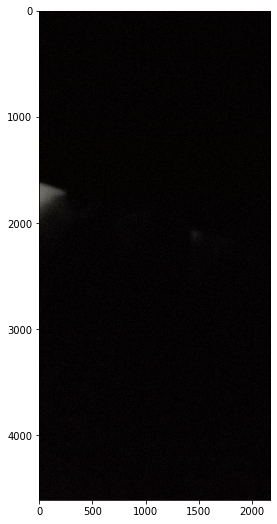

In [23]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "night4.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

Accuracy: 0.0
Your model returned '1' which implies 'Night'


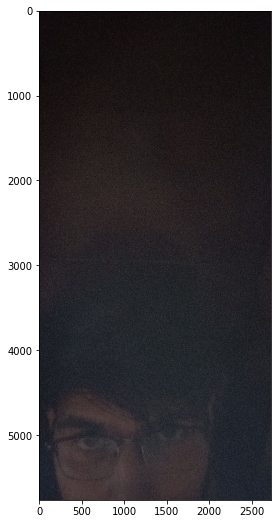

In [24]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "me3.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

Accuracy: 0.0
Your model returned '1' which implies 'Night'


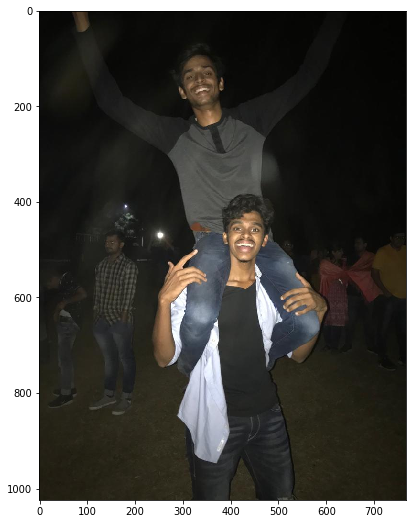

In [25]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "baali.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()

Accuracy: 0.0
Your model returned '1' which implies 'Night'


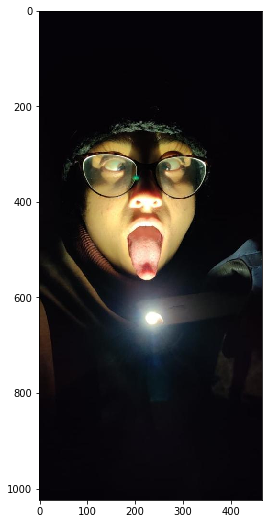

In [26]:
DATADIR = 'C:/Users/Achleshwar Luthra/Desktop/Data-Science/Day-Night Classifier/test_images'
IMG_SIZE = 64
img = "shabbo.jpg"
class_name = 0 # Day
classes = ['Day', 'Night']
img_array = cv2.imread(os.path.join(DATADIR, img))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array_test_flatten = img_array_test.reshape(1,-1).T
img_array_test = img_array_test_flatten/255.
pred_test = predict(img_array_test, class_name, parameters)
print("Your model returned '{}' which implies '{}'".format(str(int(np.squeeze(pred_test))), classes[int(np.squeeze(pred_test))]))
plt.figure(figsize = (50,9))
plt.imshow(img_array)
plt.show()